# BigDataMartSales

In [1]:
#Importing some necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing both train and test data
data_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

We have two type of data one is for training the model and other is only for testing

In [3]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data_train.shape

(8523, 12)

In train data we have 8523 rows and 12 columns

In [6]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
data_test.shape

(5681, 11)

In test data we have 5681 rows and 11 columns

In [8]:
#Adding source columns to both train and test data with 'train' and 'test' values
data_train['source'] = 'train'
data_test['source'] = 'test'
data_test['Item_Outlet_Sales'] = 0
df = pd.concat([data_train,data_test],ignore_index = True) #Combining both train and test data
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [9]:
df.shape

(14204, 13)

As we can see by combining both the data we have 14204 rows and 13 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [11]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

As we can see our target variable have continuous data so we can say that it is regression problem

In [12]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

There are two columns have null values 'item_weight' = 2439 and 'Outlet_size' = 4016

In [14]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

There are 3 classes in outlet size 'Medium' , Small and High 

In [15]:
#first fill Nan's
mean = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean,inplace = True)

mode = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode,inplace = True)

Filling Nan values , For Item_Weight we are using mean() because it has continuous data and for Outlet_size we are using mode because it has nominal data

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

By filling null values we can see that there are no null values available in the dataset

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

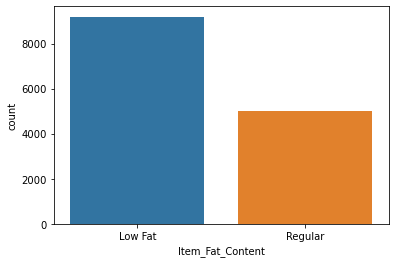

In [17]:
#Replacing names of the classes have same content
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace = True)
df['Item_Fat_Content'].replace('LF','Low Fat',inplace =True)
df['Item_Fat_Content'].replace('reg','Regular',inplace =True)

sns.countplot(df['Item_Fat_Content'])
df['Item_Fat_Content'].value_counts()

As we can see more number of products have Low Fat

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

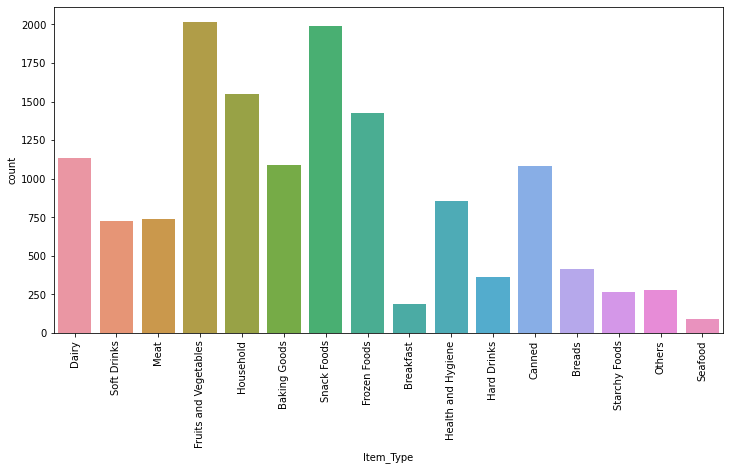

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(df['Item_Type'])
plt.xticks(rotation = 90)

df['Item_Type'].value_counts()

As we can see fruits and veg have more value counts than others

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

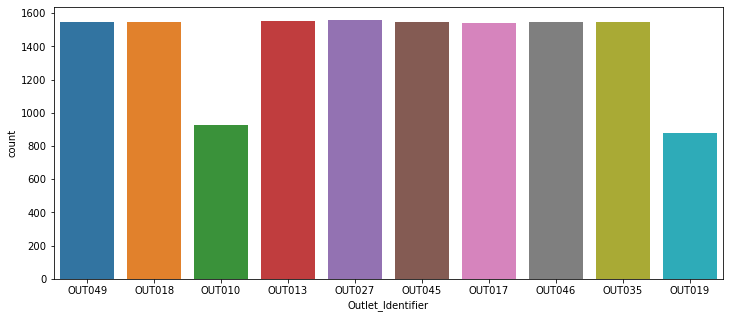

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(df['Outlet_Identifier'])
df['Outlet_Identifier'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

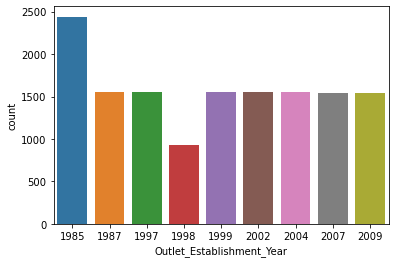

In [20]:
sns.countplot(df['Outlet_Establishment_Year'])
df['Outlet_Establishment_Year'].value_counts()

More outlet establishment are in 1985 

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

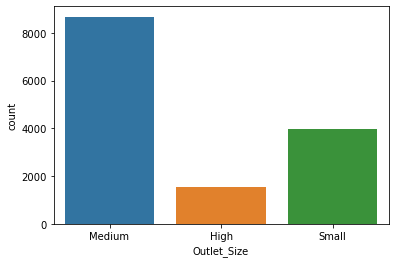

In [21]:
sns.countplot(df['Outlet_Size'])
df['Outlet_Size'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

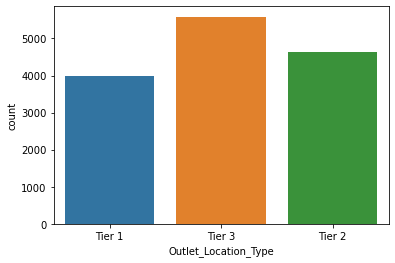

In [22]:
sns.countplot(df['Outlet_Location_Type'])
df['Outlet_Location_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

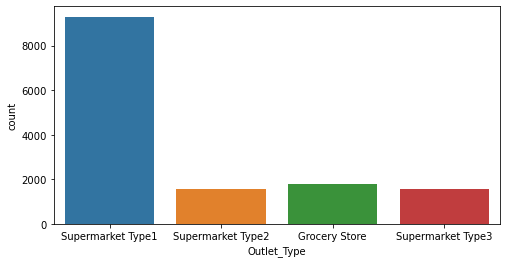

In [23]:
plt.figure(figsize =(8,4))
sns.countplot(df['Outlet_Type'])
df['Outlet_Type'].value_counts()

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

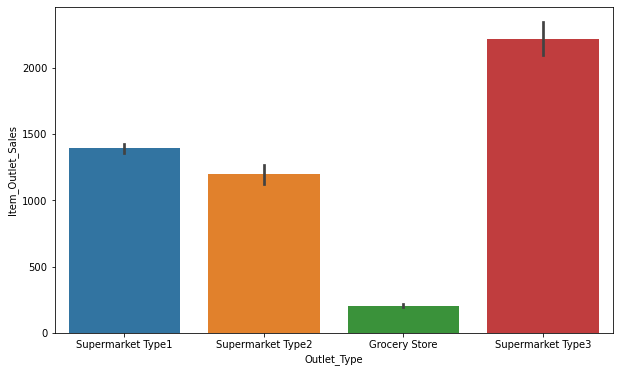

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outlet_Type', y='Item_Outlet_Sales', data = df)

Outlet sales are more in SuperMarket Type 3

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

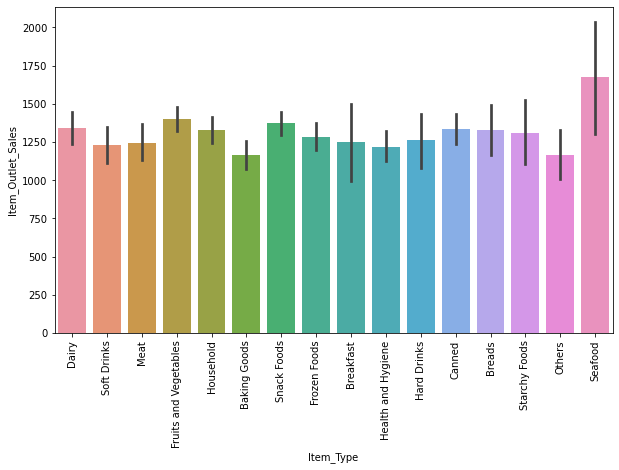

In [25]:
fig = plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.barplot(x = 'Item_Type', y='Item_Outlet_Sales', data = df)

Seafood type of Items have more sales relative to others

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

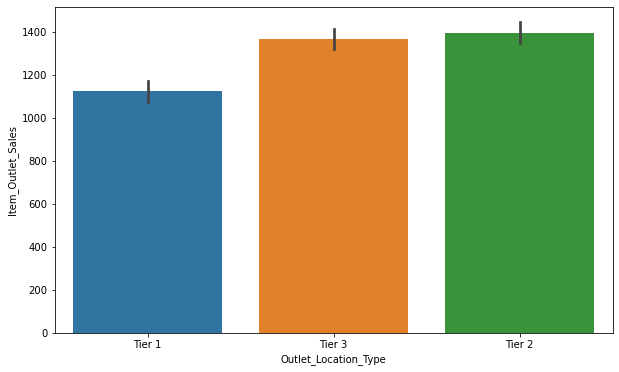

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Outlet_Location_Type', y='Item_Outlet_Sales', data = df)

Comparing to the Tier 1 , Tier2 & Tier3 have more number of sales

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

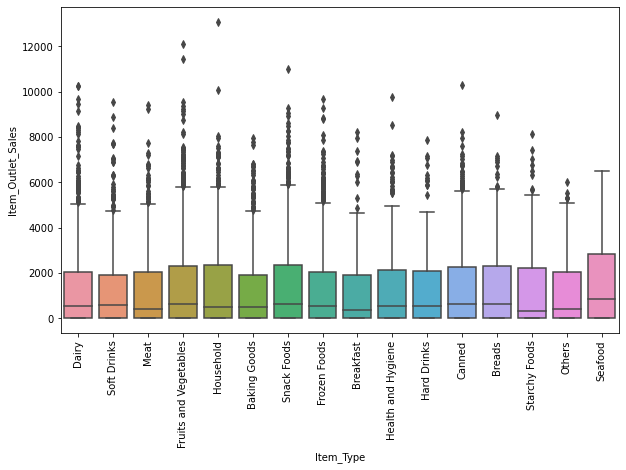

In [27]:
fig = plt.figure(figsize = (10,6))
plt.xticks(rotation = 90)
sns.boxplot(x = 'Item_Type', y='Item_Outlet_Sales', data = df)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

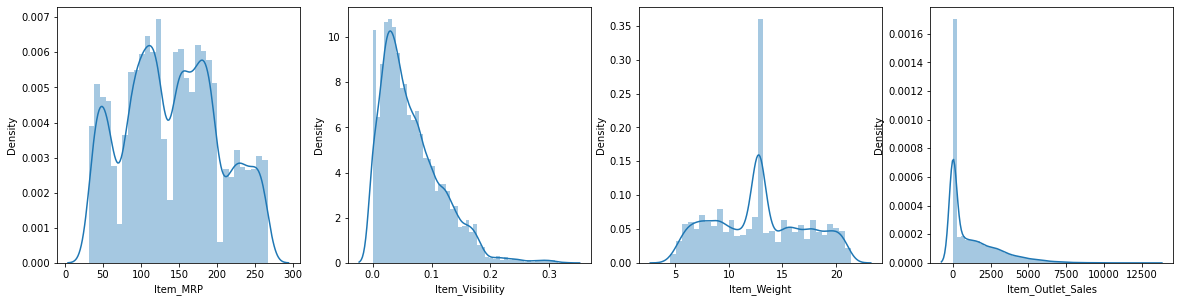

In [28]:
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
sns.distplot(df['Item_MRP'])
plt.subplot(3,4,2)
sns.distplot(df['Item_Visibility'])
plt.subplot(3,4,3)
sns.distplot(df['Item_Weight'])
plt.subplot(3,4,4)
sns.distplot(df['Item_Outlet_Sales'])

As we can see all columns are not normally distributed some columns have skewness

<AxesSubplot:xlabel='Item_Outlet_Sales'>

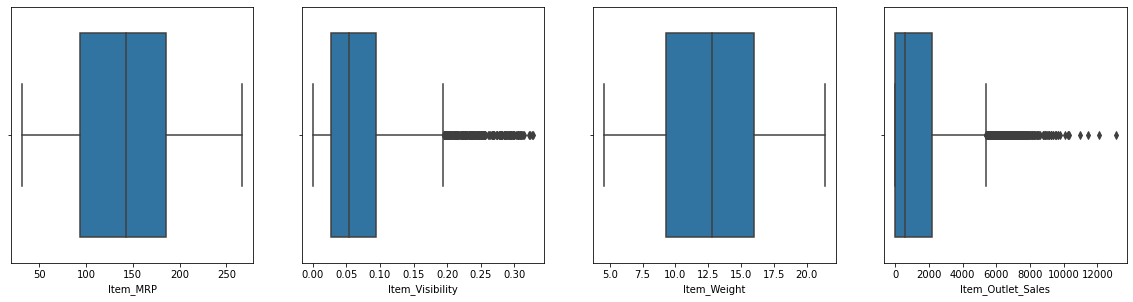

In [29]:
plt.figure(figsize=(20,16))
plt.subplot(3,4,1)
sns.boxplot(df['Item_MRP'])
plt.subplot(3,4,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(3,4,3)
sns.boxplot(df['Item_Weight'])
plt.subplot(3,4,4)
sns.boxplot(df['Item_Outlet_Sales'])

By observing above plot we can say that Item Visibility  and item_outlet_sales have outlier but outle_sales is our target variable

<AxesSubplot:>

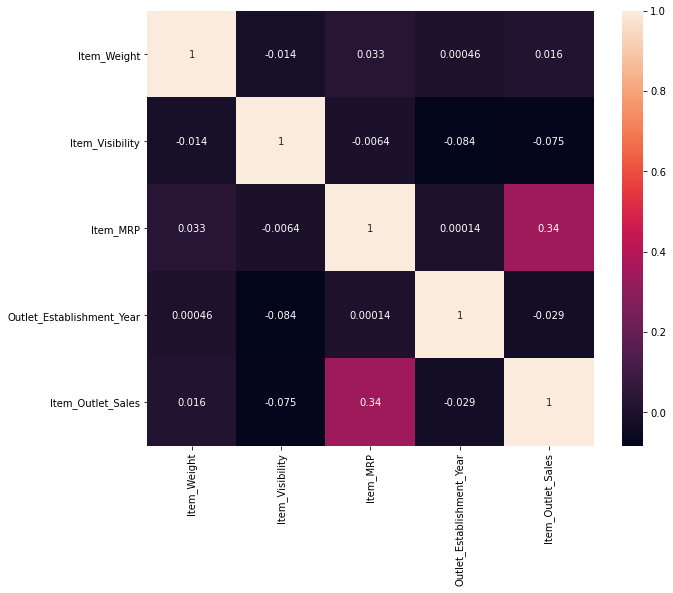

In [30]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True)

Only Item MRP have positive corelation or more corelation

In [31]:
df.skew()

Item_Weight                  0.111314
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

There are skewness in Item_Visibility column

In [32]:
#finding boundary values
print('Highest allowed',df['Item_Visibility'].mean()+3*df['Item_Visibility'].std())

Highest allowed 0.22032856581926258


More than 0.22 Item_Visibility is outliers so we have to remove this

In [33]:
#Remove outliers
df = df[(df['Item_Visibility']<0.22)]

Outlier removed

In [34]:
#Removing Skewness
df.skew()

Item_Weight                  0.110116
Item_Visibility              0.793813
Item_MRP                     0.130513
Outlet_Establishment_Year   -0.410046
Item_Outlet_Sales            1.527610
dtype: float64

After removing outlier the skewness also reduced but we have reduced it little bit more

In [35]:
df['Item_Visibility']  = np.sqrt(df['Item_Visibility'])

By using Sqrt we are reducing skewness

In [36]:
df.skew()

Item_Weight                  0.110116
Item_Visibility             -0.259992
Item_MRP                     0.130513
Outlet_Establishment_Year   -0.410046
Item_Outlet_Sales            1.527610
dtype: float64

Skewness reduced from 0.7 to -0.25

In [37]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['Item_Identifier']

0        FD
1        DR
2        FD
3        FD
4        NC
         ..
14199    FD
14200    FD
14201    NC
14202    FD
14203    FD
Name: Item_Identifier, Length: 14028, dtype: object

Getting first 2  letters from Item_Identifier columns for easy encoding

In [38]:
lab_enc = LabelEncoder()
encode = ['Item_Identifier','Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type']
for i in encode:
    df[i] = lab_enc.fit_transform(df[i])
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,1,9.30,0,0.126678,4,249.8092,OUT049,1999,1,0,1,3735.1380,train
1,0,5.92,1,0.138846,14,48.2692,OUT018,2009,1,2,2,443.4228,train
2,1,17.50,0,0.129461,10,141.6180,OUT049,1999,1,0,1,2097.2700,train
3,1,19.20,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800,train
4,2,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,1,10.50,1,0.116174,13,141.3154,OUT046,1997,2,0,1,0.0000,test
14200,1,7.60,1,0.378141,15,169.1448,OUT018,2009,1,2,2,0.0000,test
14201,2,10.00,0,0.271162,8,118.7440,OUT045,2002,1,1,1,0.0000,test
14202,1,15.30,1,0.000000,3,214.6218,OUT017,2007,1,1,1,0.0000,test


Encode all the columns by Label encoding

In [39]:
df.drop(columns=["Outlet_Identifier"],inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,1,9.30,0,0.126678,4,249.8092,1999,1,0,1,3735.1380,train
1,0,5.92,1,0.138846,14,48.2692,2009,1,2,2,443.4228,train
2,1,17.50,0,0.129461,10,141.6180,1999,1,0,1,2097.2700,train
3,1,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800,train
4,2,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,1,10.50,1,0.116174,13,141.3154,1997,2,0,1,0.0000,test
14200,1,7.60,1,0.378141,15,169.1448,2009,1,2,2,0.0000,test
14201,2,10.00,0,0.271162,8,118.7440,2002,1,1,1,0.0000,test
14202,1,15.30,1,0.000000,3,214.6218,2007,1,1,1,0.0000,test


Droping Outlet_Identifier column beacause it is not have so much corelation with sales

In [40]:
df_train=df.loc[df["source"]=="train"]
df_test=df.loc[df["source"]=="test"]
df_test.reset_index(drop=True,inplace=True)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,1,20.750000,0,0.086976,13,107.8622,1999,1,0,1,0.0,test
1,1,8.300000,1,0.196030,4,87.3198,2007,1,1,1,0.0,test
2,2,14.600000,0,0.315555,11,241.7538,1998,1,2,0,0.0,test
3,1,7.315000,0,0.124050,13,155.0340,2007,1,1,1,0.0,test
4,1,12.792854,1,0.344383,4,234.2300,1985,1,2,3,0.0,test


Seperating train data and test data

In [41]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,1,9.30,0,0.126678,4,249.8092,1999,1,0,1,3735.1380,train
1,0,5.92,1,0.138846,14,48.2692,2009,1,2,2,443.4228,train
2,1,17.50,0,0.129461,10,141.6180,1999,1,0,1,2097.2700,train
3,1,19.20,1,0.000000,6,182.0950,1998,1,2,0,732.3800,train
4,2,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052,train


In [42]:
#lets drop source column from df_train and df_test
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

Droping source column which we added at the time of combinig the both data

In [43]:
#Lets drop the Item_Outlet_Sales from test dataset as that is the o/p variable that needs to be predicted
df_test.drop(columns=["Item_Outlet_Sales"],inplace=True)

Droping Item_Outlet_Sales column from test data which we added with 0 value

In [44]:
#seprating input and output from df_train
x = df_train.drop('Item_Outlet_Sales',axis =1)
y = df_train["Item_Outlet_Sales"]

Separating target variable and independent variable with x and y

In [45]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Scaling the data

In [46]:
#Finding the best random state
maxR2 = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    R2score = r2_score(y_test,pred)
    if R2score > maxR2:
        maxR2 = R2score
        maxRS = i
print('R2 score is',maxR2, 'on Random State',maxRS)

R2 score is 0.5383868525038185 on Random State 160


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
LRR = r2_score(y_test,predlr)
print('R2_Score of Linear regression:',LRR)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predlr)))

R2_Score of Linear regression: 0.5383868525038185
RMSE is:  1187.3332509103743


By using linear regression we get 0.53 r2 score

In [49]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
RFR = r2_score(y_test,predrf)
print('R2_score of Random Forest:',RFR)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predrf)))

R2_score of Random Forest: 0.5833172522374527
RMSE is:  1128.0706633430548


By using RandomForestRegressor we get 0.58 r2 score

In [50]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
DTR = r2_score(y_test,preddt)
print('R2_score of DT:',DTR)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,preddt)))

R2_score of DT: 0.21667561374751176
RMSE is:  1546.693886529445


By using DecisionTreeRegressor we get 0.21 r2 score

In [62]:
SVR = SVR
SVR.fit(x_train,y_train)
predsvr = SVR.predict(x_test)
SVRR = r2_score(y_test,predsvr)
print('R2_score of SVR :',SVRR)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predsvr)))

R2_score of SVR : 0.03470246106217478
RMSE is:  1716.9756847213005


By using SVR we get 0.034 r2 score

In [52]:
KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)
KNNR = r2_score(y_test,predknn)
print('R2_score of KNN :',KNNR)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,predknn)))

R2_score of KNN : 0.5319438900106421
RMSE is:  1195.5906357057188


By using KNeighborsRegressor we get 0.53 r2 score

In [53]:
lrcv = cross_val_score(lr, x, y, cv = 5)
print('Cross validation score of linear regression is',lrcv.mean())

Cross validation score of linear regression is 0.5024740912689223


In [54]:
rfcv = cross_val_score(rf, x, y, cv = 5)
print('Cross validation score of RandomForestRegressor is',rfcv.mean())

Cross validation score of RandomForestRegressor is 0.5444993044020523


In [55]:
dtcv = cross_val_score(dt, x, y, cv = 5)
print('Cross validation score of DecisionTreeRegressor is',dtcv.mean())

Cross validation score of DecisionTreeRegressor is 0.1546033585356444


In [63]:
svrcv = cross_val_score(SVR, x, y, cv = 5)
print('Cross validation score of SVR is',svrcv.mean())

Cross validation score of SVR is -0.04687595007093863


In [57]:
knncv = cross_val_score(KNN, x, y, cv = 5)
print('Cross validation score of KNN is',knncv.mean())

Cross validation score of KNN is 0.39167147458742263


In [64]:
print('Difference between r2_score and Cross_val_score of LinearRgression is',LRR-(lrcv.mean()))
print('Difference between r2_score and Cross_val_score of RandomForestRegressor is',RFR-(rfcv.mean()))
print('Difference between r2_score and Cross_val_score of DecisionTreeRegressor is',DTR-(dtcv.mean()))
print('Difference between r2_score and Cross_val_score of SVC is',SVRR-(svrcv.mean()))
print('Difference between r2_score and Cross_val_score of KNN is',KNNR-(knncv.mean()))


Difference between r2_score and Cross_val_score of LinearRgression is 0.03591276123489617
Difference between r2_score and Cross_val_score of RandomForestRegressor is 0.03881794783540038
Difference between r2_score and Cross_val_score of DecisionTreeRegressor is 0.06207225521186738
Difference between r2_score and Cross_val_score of SVC is 0.08157841113311341
Difference between r2_score and Cross_val_score of KNN is 0.1402724154232195


from the difference we get random forest with less difference

In [65]:
#Parameters for RandomForestRegressor for GridSearchCV
parameters ={'n_estimators':[30,40,50,60],
             'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,5,]}

In [66]:
GCV = GridSearchCV(rf,parameters,cv = 5)

In [70]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 5],
                         'n_estimators': [30, 40, 50, 60]})

In [71]:
GCV.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 60}

We get best params

In [72]:
finalmod = RandomForestRegressor(criterion = 'mae',max_features = 'sqrt',min_samples_split = 6,n_estimators = 60)
finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('r2_score of the final model is',r2_score(y_test,pred)*100)
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,pred)))

finalmodCV = cross_val_score(finalmod, x, y, cv = 5)
print('Cross validation Score of The final model is',finalmodCV.mean()*100)


r2_score of the final model is 60.38163384389308
RMSE is:  1099.972496096645
Cross validation Score of The final model is 56.89030891018499


By using GridSearchCV we get best params which we used to fit the model and from that model we get 60.09 r_2 score and 56.83 CV Score

In [73]:
#Scaling the test data 
test_scaled  = scaler.fit_transform(df_test)
#Predicting sales of the test data
price_pred = finalmod.predict(test_scaled)

Predict the sales of the test data

In [74]:
#Make the dataframe for price_pred
price_pred=pd.DataFrame(price_pred,columns=["Item_Outlet_sales"])

In [75]:
price_pred

,Item_Outlet_sales
0,1659.556435
1,1424.257167
2,640.255473
3,2048.289313
4,5362.103525
...,...
5597,2178.741727
5598,2653.889897
5599,1882.627177
5600,4284.739255


In [77]:
df_test['Item_Outlet_sales'] = price_pred

In [78]:
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_sales
0,1,20.750000,0,0.086976,13,107.8622,1999,1,0,1,1659.556435
1,1,8.300000,1,0.196030,4,87.3198,2007,1,1,1,1424.257167
2,2,14.600000,0,0.315555,11,241.7538,1998,1,2,0,640.255473
3,1,7.315000,0,0.124050,13,155.0340,2007,1,1,1,2048.289313
4,1,12.792854,1,0.344383,4,234.2300,1985,1,2,3,5362.103525
...,...,...,...,...,...,...,...,...,...,...,...
5597,1,10.500000,1,0.116174,13,141.3154,1997,2,0,1,2178.741727
5598,1,7.600000,1,0.378141,15,169.1448,2009,1,2,2,2653.889897
5599,2,10.000000,0,0.271162,8,118.7440,2002,1,1,1,1882.627177
5600,1,15.300000,1,0.000000,3,214.6218,2007,1,1,1,4284.739255


In [79]:
import joblib
joblib.dump(finalmod,'BigDataMart.pkl')

['BigDataMart.pkl']